In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,450 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and dire

기울기 w: 0.3570
절편 b: 0.1068
평균 제곱 오차 (MSE): 0.1022


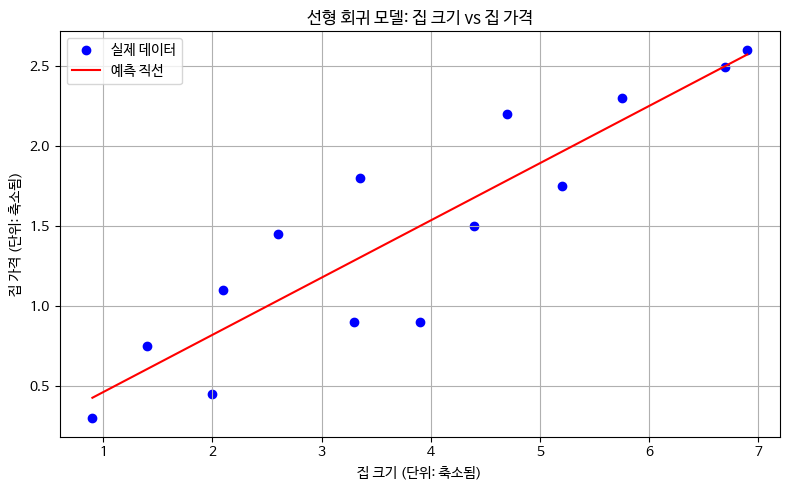

In [ ]:
# 실습1 문제 코드 - 선형 회귀 + MSE
import numpy as np
# import matplotlib.pyplot as plt # 한글파일 문제없는 분들은 맨 앞 주석 빼고 진행

# 입력 변수 (집 크기)와 출력 변수 (집 가격)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# 1. 선형 회귀 수식 구하기
######## 가중치 w, 상수(y절편) b로 객체 생성하고 넘파이의 polyfit()함수 이용 ########
w, b = np.polyfit(house_size, house_price, 1)

# 2. 예측값 계산
######## predicted_price변수에 회귀 함수식 지정########
predicted_price = w * house_size + b

# 3. MSE 계산
######## MSE 수식을 쓰고, mse라는 객체로 지정하세요 ########
mse = np.mean((house_price - predicted_price) ** 2)

# 결과 출력
print(f"기울기 w: {w:.4f}")
print(f"절편 b: {b:.4f}")
print(f"평균 제곱 오차 (MSE): {mse:.4f}")

# 시각화
plt.figure(figsize=(8, 5))
plt.scatter(house_size, house_price, color='blue', label='실제 데이터')
plt.plot(house_size, predicted_price, color='red', label='예측 직선')
plt.title("선형 회귀 모델: 집 크기 vs 집 가격")
plt.xlabel("집 크기 (단위: 축소됨)")
plt.ylabel("집 가격 (단위: 축소됨)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

학습 완료! 기울기 w = 0.3572, 절편 b = 0.1061
최종 MSE: 0.1022


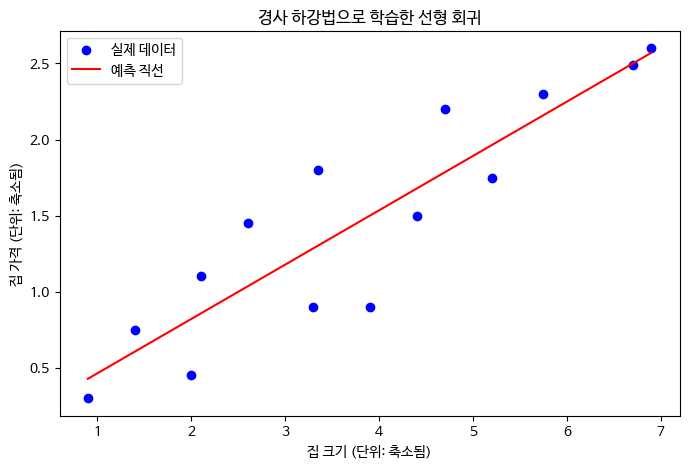

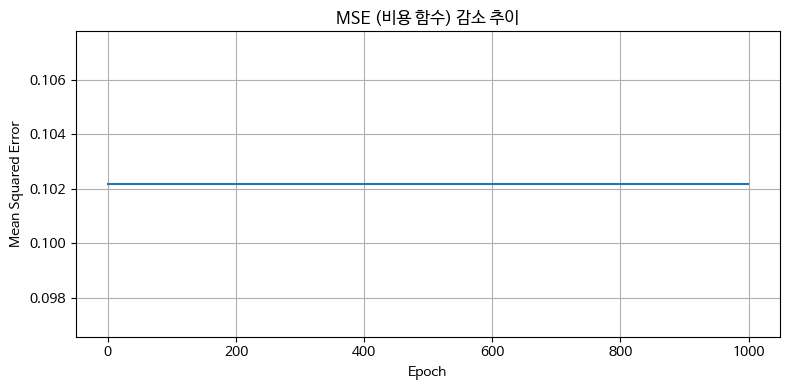

In [ ]:
# 실습2 문제 코드 - 기울기 하강법으로 선형 회귀 실습
# 초기 파라미터
w = 0.0
b = 0.0
lr = 0.01       # 학습률 (learning rate)
epochs = 1000   # 반복 횟수=> ML/DL에서 최적화할 때 변경하는 수치
n = len(house_size)

# 비용 추적용 리스트
cost_list = []

# 경사 하강법
for epoch in range(epochs):
    y_pred = w * house_size + b
    error = y_pred - house_price

    dw = (2/n) * np.dot(error, house_size)
    db = (2/n) * error.sum()

    w -= lr * dw        # w = w - lr * dw
    b -= lr * db        # b = b - lr * db

    mes = np.mean(error ** 2)
    cost_list.append(mse)

    ######## y_pred 변수에 회귀 함수식 지정########
    ######## error 변수에 에러(loss) 계산 지정 ########

    ######## w에 대해 미분한 식을 dw 객체 지정 ######## dw = (2/n) * np.dot(error, house_size)
    ######## b에 대해 미분한 값을 db 객체 지정 ######## db = (2/n) * error.sum()

    ######## w 계산해 w 객체에 업데이트 ########
    ######## b 계산해 b 객체에 업데이트 ########

    ######## mse 계산해 mse 객체 지정 ########
    ######## mse값 cost_list에 지정 ########

# 최종 결과 출력
print(f"학습 완료! 기울기 w = {w:.4f}, 절편 b = {b:.4f}")
print(f"최종 MSE: {mse:.4f}")

# 회귀선 예측
predicted_price = w * house_size + b

# 실제 데이터와 예측 직선 시각화
plt.figure(figsize=(8, 5))
plt.scatter(house_size, house_price, color='blue', label='실제 데이터')
plt.plot(house_size, predicted_price, color='red', label='예측 직선')
plt.title("경사 하강법으로 학습한 선형 회귀")
plt.xlabel("집 크기 (단위: 축소됨)")
plt.ylabel("집 가격 (단위: 축소됨)")
plt.legend()
plt.grid

# 비용 함수 수렴 시각화
plt.figure(figsize=(8, 4))
plt.plot(cost_list)
plt.title("MSE (비용 함수) 감소 추이")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.tight_layout()
plt.show()

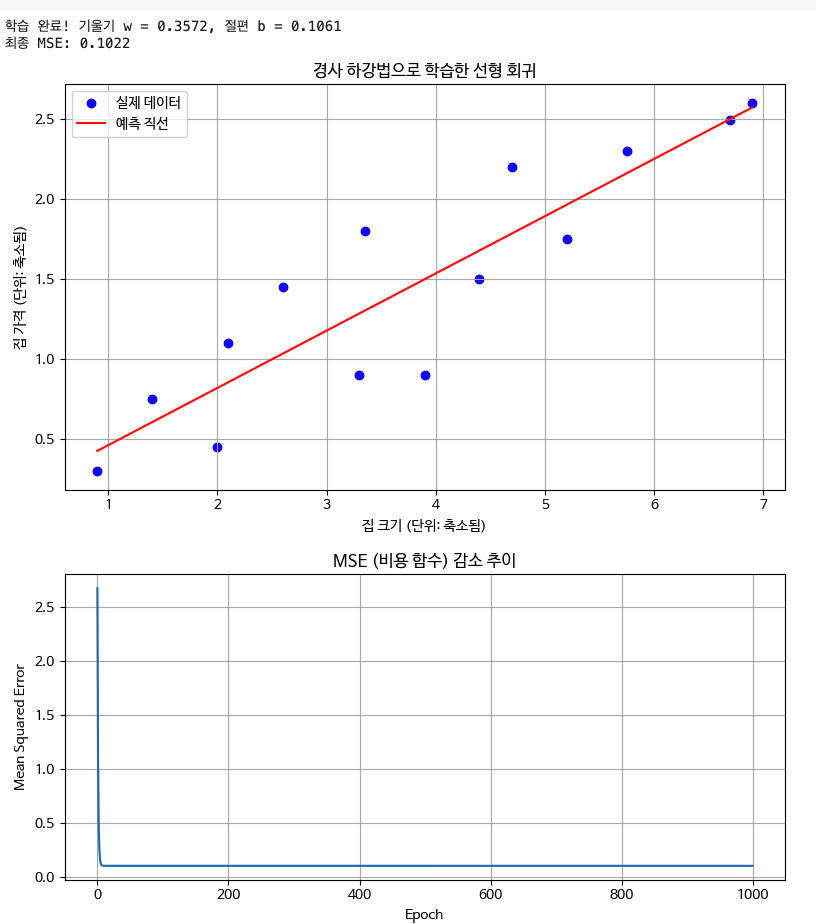

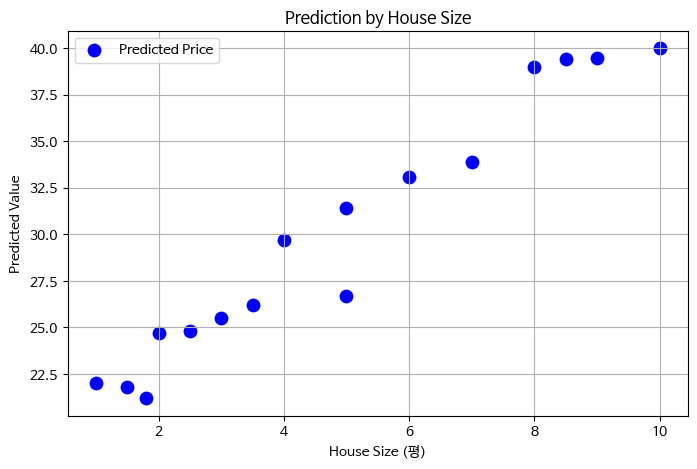

In [ ]:
#실습3 문제 코드 - 다중 선형 회귀

# 1. 입력 변수
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

# 2. 설계 행렬 X 정의
X = np.array([
    np.ones(16),                   # np.ones(16): 모든 행마다 1을 추가하기 위해 (총 16개의 1 필요)
    house_size,
    distance_from_station,
    number_of_rooms
]).T

# 3. 파라미터 (임의로 설정)
theta = np.array([1, 2, 3, 4])  # θ₀=1, θ₁=2, θ₂=3, θ₃=4

# 4. 다중 선형 회귀 가설 함수
def prediction(X, theta):
    ####### 여기에 함수 정의 하세요 ########
    y = X @ theta
    return y

# 5. 예측값 계산
y_pred = prediction(X, theta)

# 6. 시각화 (집 크기 vs 예측값)
plt.figure(figsize=(8, 5))
plt.scatter(house_size, y_pred, color='blue', label='Predicted Price', s=80)
plt.xlabel("House Size (평)")
plt.ylabel("Predicted Value")
plt.title("Prediction by House Size")
plt.grid(True)
plt.legend()

# 2. Salary 데이터로 선형회귀 기본 코딩 (사이킷런 사용X)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/스터디/training_test_data.csv")

In [ ]:
data

,Age,Gender,Experience,Income
0,50,1,15,180
1,29,1,5,163
2,36,1,6,134
3,34,2,4,132
4,46,1,9,188
...,...,...,...,...
95,46,2,19,198
96,31,1,6,130
97,57,2,29,168
98,22,1,1,129


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         100 non-null    int64
 1   Gender      100 non-null    int64
 2   Experience  100 non-null    int64
 3   Income      100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB


In [ ]:
data.describe()

,Age,Gender,Experience,Income
count,100.000000,100.000000,100.000000,100.000000
mean,38.880000,1.490000,11.980000,151.890000
std,12.275688,0.502418,10.458171,28.001405
min,21.000000,1.000000,0.000000,103.000000
25%,28.000000,1.000000,2.000000,127.000000
50%,37.000000,1.000000,9.000000,154.000000
75%,50.000000,2.000000,21.000000,174.000000
max,60.000000,2.000000,33.000000,200.000000


In [ ]:
# 원래 전처리 해야함 오늘은 패쓰

In [ ]:
# 판다스의 테이터에서 넘파이로 변환 => 머신러닝 모델 학습 위해!

data_np = data.values

In [ ]:
# 2차원 배열로 변경 완료
data_np

array([[ 50,   1,  15, 180],
       [ 29,   1,   5, 163],
       [ 36,   1,   6, 134],
       [ 34,   2,   4, 132],
       [ 46,   1,   9, 188],
       [ 33,   1,   3, 127],
       [ 26,   2,   8, 141],
       [ 23,   1,   5, 122],
       [ 48,   1,   7, 169],
       [ 24,   1,   5, 114],
       [ 44,   1,  10, 174],
       [ 60,   1,  25, 190],
       [ 51,   2,  17, 190],
       [ 24,   2,   1, 110],
       [ 28,   1,   2, 120],
       [ 32,   1,   3, 130],
       [ 46,   1,  12, 165],
       [ 39,   1,  10, 170],
       [ 23,   2,   3, 120],
       [ 28,   1,   1, 130],
       [ 33,   1,   3, 133],
       [ 48,   2,  15, 167],
       [ 39,   1,   6, 155],
       [ 40,   1,   9, 159],
       [ 46,   1,  13, 179],
       [ 49,   2,  22, 200],
       [ 28,   1,   3, 120],
       [ 30,   2,   1, 145],
       [ 52,   2,  27, 181],
       [ 51,   2,  21, 198],
       [ 22,   2,   1, 112],
       [ 31,   2,   4, 143],
       [ 28,   2,   2, 104],
       [ 38,   1,  11, 160],
       [ 40,  

In [ ]:
# 독립변수 종속변수 구분

X = data_np[:,:-1]
y = data_np[:,-1]

In [ ]:
X

array([[50,  1, 15],
       [29,  1,  5],
       [36,  1,  6],
       [34,  2,  4],
       [46,  1,  9],
       [33,  1,  3],
       [26,  2,  8],
       [23,  1,  5],
       [48,  1,  7],
       [24,  1,  5],
       [44,  1, 10],
       [60,  1, 25],
       [51,  2, 17],
       [24,  2,  1],
       [28,  1,  2],
       [32,  1,  3],
       [46,  1, 12],
       [39,  1, 10],
       [23,  2,  3],
       [28,  1,  1],
       [33,  1,  3],
       [48,  2, 15],
       [39,  1,  6],
       [40,  1,  9],
       [46,  1, 13],
       [49,  2, 22],
       [28,  1,  3],
       [30,  2,  1],
       [52,  2, 27],
       [51,  2, 21],
       [22,  2,  1],
       [31,  2,  4],
       [28,  2,  2],
       [38,  1, 11],
       [40,  1, 13],
       [35,  1,  5],
       [21,  2,  1],
       [37,  2, 10],
       [57,  1, 30],
       [41,  2, 15],
       [49,  2, 22],
       [30,  2,  2],
       [26,  2,  1],
       [37,  2, 11],
       [28,  2,  2],
       [59,  1, 33],
       [29,  1,  2],
       [23,  

In [ ]:
y

array([180, 163, 134, 132, 188, 127, 141, 122, 169, 114, 174, 190, 190,
       110, 120, 130, 165, 170, 120, 130, 133, 167, 155, 159, 179, 200,
       120, 145, 181, 198, 112, 143, 104, 160, 199, 127, 115, 146, 154,
       191, 155, 147, 110, 151, 127, 197, 117, 130, 151, 137, 181, 115,
       145, 178, 194, 126, 198, 138, 129, 131, 113, 155, 122, 159, 165,
       103, 141, 159, 194, 120, 118, 168, 156, 185, 156, 138, 174, 158,
       191, 154, 114, 200, 168, 155, 124, 160, 190, 124, 120, 189, 144,
       155, 125, 166, 197, 198, 130, 168, 129, 190])

## (1) 첫번째 모델 - 절편 없음

In [ ]:
b = np.dot(np.linalg.inv(X.T @ X), X.T @ y)     # np.linalg.inv(X.T @ X))) -> (X^T*X)^-1

In [ ]:
b

array([ 4.41868053,  8.71283132, -2.83170131])

**해석**
1. 나이가 1살 많을 수록 소득은 4.41 증가
2. 성별이 1->2 바뀌면 소득이 8.71 증가
3. 경력이 1년 늘어나면 소득은 3.83 하락

## (2) 두번째 모델링 - 절편 추가

In [ ]:
X2 = np.c_[np.ones(100), X]

In [ ]:
X2

array([[ 1., 50.,  1., 15.],
       [ 1., 29.,  1.,  5.],
       [ 1., 36.,  1.,  6.],
       [ 1., 34.,  2.,  4.],
       [ 1., 46.,  1.,  9.],
       [ 1., 33.,  1.,  3.],
       [ 1., 26.,  2.,  8.],
       [ 1., 23.,  1.,  5.],
       [ 1., 48.,  1.,  7.],
       [ 1., 24.,  1.,  5.],
       [ 1., 44.,  1., 10.],
       [ 1., 60.,  1., 25.],
       [ 1., 51.,  2., 17.],
       [ 1., 24.,  2.,  1.],
       [ 1., 28.,  1.,  2.],
       [ 1., 32.,  1.,  3.],
       [ 1., 46.,  1., 12.],
       [ 1., 39.,  1., 10.],
       [ 1., 23.,  2.,  3.],
       [ 1., 28.,  1.,  1.],
       [ 1., 33.,  1.,  3.],
       [ 1., 48.,  2., 15.],
       [ 1., 39.,  1.,  6.],
       [ 1., 40.,  1.,  9.],
       [ 1., 46.,  1., 13.],
       [ 1., 49.,  2., 22.],
       [ 1., 28.,  1.,  3.],
       [ 1., 30.,  2.,  1.],
       [ 1., 52.,  2., 27.],
       [ 1., 51.,  2., 21.],
       [ 1., 22.,  2.,  1.],
       [ 1., 31.,  2.,  4.],
       [ 1., 28.,  2.,  2.],
       [ 1., 38.,  1., 11.],
       [ 1., 4

In [ ]:
b_new = np.dot(np.linalg.inv(X2.T @ X2), X2.T @ y)

In [ ]:
b_new

array([68.88780097,  2.36480213, -0.89890187, -0.63455294])

## (3) Salary 데이터로 선형회귀 - 사이킷런 이용 코딩

In [ ]:
data

,Age,Gender,Experience,Income
0,50,1,15,180
1,29,1,5,163
2,36,1,6,134
3,34,2,4,132
4,46,1,9,188
...,...,...,...,...
95,46,2,19,198
96,31,1,6,130
97,57,2,29,168
98,22,1,1,129


In [ ]:
data_np = data.values

In [ ]:
data_np

array([[ 50,   1,  15, 180],
       [ 29,   1,   5, 163],
       [ 36,   1,   6, 134],
       [ 34,   2,   4, 132],
       [ 46,   1,   9, 188],
       [ 33,   1,   3, 127],
       [ 26,   2,   8, 141],
       [ 23,   1,   5, 122],
       [ 48,   1,   7, 169],
       [ 24,   1,   5, 114],
       [ 44,   1,  10, 174],
       [ 60,   1,  25, 190],
       [ 51,   2,  17, 190],
       [ 24,   2,   1, 110],
       [ 28,   1,   2, 120],
       [ 32,   1,   3, 130],
       [ 46,   1,  12, 165],
       [ 39,   1,  10, 170],
       [ 23,   2,   3, 120],
       [ 28,   1,   1, 130],
       [ 33,   1,   3, 133],
       [ 48,   2,  15, 167],
       [ 39,   1,   6, 155],
       [ 40,   1,   9, 159],
       [ 46,   1,  13, 179],
       [ 49,   2,  22, 200],
       [ 28,   1,   3, 120],
       [ 30,   2,   1, 145],
       [ 52,   2,  27, 181],
       [ 51,   2,  21, 198],
       [ 22,   2,   1, 112],
       [ 31,   2,   4, 143],
       [ 28,   2,   2, 104],
       [ 38,   1,  11, 160],
       [ 40,  

In [ ]:
X = data_np[:, :-1]
y = data_np[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train.shape

(70, 3)

In [ ]:
X_test.shape

(30, 3)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 모델링

model = LinearRegression()

In [ ]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 모델 평가 - R^2
model.score(X_test, y_test)

0.6564010483124393

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, model.predict(X_test))

0.6564010483124393

In [ ]:
# 사이킷런에 들어가있는 데이터베이스!!! 불러와서 사용
from sklearn.datasets import fetch_california_housing

In [ ]:
# 데이터 불러오기 (독립변수, 종속변수)
X, y = fetch_california_housing(return_X_y=True)

In [ ]:
# 위와 같은 코드
#data = fatch_fetch_california_housing()
#X, y = data.data, data.target

In [ ]:
X.shape

(20640, 8)

In [ ]:
# 데스트 데이터 트레이닝 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
model_lr.score(X_test, y_test)

0.595770232606166

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# 릿지 회귀 모델링
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
model_ridge.score(X_test, y_test)

0.5957941064984298

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [ ]:
model_lasso.score(X_test, y_test)

0.45429495443531964

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
model_elastic.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
model_elastic.score(X_test, y_test)

0.5755216146456117

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print("LinearRegression MSE: ", mean_squared_error(y_test, model_lr.predict(X_test)))
print("Ridge MSE: ", mean_squared_error(y_test, model_ridge.predict(X_test)))
print("Lasso MSE: ", mean_squared_error(y_test, model_lasso.predict(X_test)))
print("ElasticNet MSE: ", mean_squared_error(y_test, model_elastic.predict(X_test)))

LinearRegression MSE:  0.5305677824766757
Ridge MSE:  0.5305364470355499
Lasso MSE:  0.7162597593400347
ElasticNet MSE:  0.5571449056777036


In [ ]:
print("LinearRegression MSE: ", (mean_squared_error(y_test, model_lr.predict(X_test)))**(1/2))
#print("Ridge MSE: ", mean_squared_error(y_test, model_ridge.predict(X_test)))
#print("Lasso MSE: ", mean_squared_error(y_test, model_lasso.predict(X_test)))
#rint("ElasticNet MSE: ", mean_squared_error(y_test, model_elastic.predict(X_test)))

LinearRegression MSE:  0.7284008391515455
